In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [ ]:
plt.rcParams.update({
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "figure.titlesize": 16
})

  # Configuration

In [ ]:
# ========================================
# CATEGORY TOGGLES
# ========================================
USE_4_CATEGORIES = False  # background categories: if True, split NaN out of Comb

# Phase 1: DO NOT apply photon-conversion veto
APPLY_GAMMA_VETO = False
GAMMAVETO_THRESHOLD = 0.1  # kept for later phases, not used now

In [ ]:
# Define decay modes, trees, and D0 mass window cuts
decay_config = {
    'kmpip': {
        'ds_tree': 'DstreeCh1',
        'cut': "(-0.014291 <= D0_dM) & (D0_dM <= 0.014152)"
    },
    'km3pi': {
        'ds_tree': 'DstreeCh3',
        'cut': "(-0.013093 <= D0_dM) & (D0_dM <= 0.012520)"
    },
    'kmpippi0_eff20_May2020': {
        'ds_tree': 'DstreeCh2',
        'cut': "(-0.052152 <= D0_dM) & (D0_dM <= 0.024237)"
    }
}

# Background samples
background_samples = ["ccbar", "charged", "ddbar", "mixed", "ssbar", "uubar"]

  # Prep-Work

  ### Import Data

In [5]:
DataFrames = {}  # dictionary to hold dataframes

print("Loading Signal files...")
for mode, config in tqdm(list(decay_config.items()), desc="Signal modes"):
    signal_file = f"/home/belle2/amubarak/C01-Simulated_Events/Signal/output_test_{mode}.root"
    df = uproot.concatenate(f"{signal_file}:{config['ds_tree']}", library='pd')
    df = df.query(config['cut'])
    DataFrames[f"Signal_{mode}"] = df

print("\nLoading Background files...")
for sample in tqdm(background_samples, desc="Background samples"):
    for mode, config in decay_config.items():
        generic_file = f"/group/belle/users/amubarak/03-KEKCC/Ds2D0e-Generic_Ds_120725_1_{sample}_{mode}.root"
        df = uproot.concatenate(f"{generic_file}:{config['ds_tree']}", library='pd')
        df = df.query(config['cut'])
        DataFrames[f"{sample}_{mode}"] = df

print("\nCombining background samples by mode...")
for mode in decay_config.keys():
    dfs_list = [DataFrames[f"{sample}_{mode}"] for sample in background_samples]
    DataFrames[f"All_{mode}"] = pd.concat(dfs_list, ignore_index=True)

print("\nData loading complete!")
print(f"Successfully loaded {len(DataFrames)} dataframes")
print(f"Using {'4' if USE_4_CATEGORIES else '3'} background categories")
print(f"APPLY_GAMMA_VETO = {APPLY_GAMMA_VETO}")

Loading Signal files...


Signal modes:   0%|          | 0/3 [00:00<?, ?it/s]


Loading Background files...


Background samples:   0%|          | 0/6 [00:00<?, ?it/s]


Combining background samples by mode...

Data loading complete!
Successfully loaded 24 dataframes
Using 3 background categories
APPLY_GAMMA_VETO = False


In [ ]:
pd.set_option('display.max_rows', 200000)
pd.set_option('display.max_columns', 200000)

 # PRELIMINARY RESULTS
 ---

  ## Value Counts - Ds_mcPDG

  ### Signal Samples: Ds_mcPDG and Ds* ancestry checks

In [7]:
for mode in decay_config.keys():
    print(f"\n{'='*80}")
    print(f"Signal_{mode} : abs(Ds_mcPDG) fractions")
    print('='*80)
    df_sig = DataFrames[f"Signal_{mode}"]
    print(abs(df_sig['Ds_mcPDG']).value_counts(normalize=True, dropna=False)
          .apply(lambda x: f"{x:.6f}"))

    # D*+ ancestry checks for Ds_mcPDG = 433
    mask_dsstar = abs(df_sig['Ds_mcPDG']) == 433
    df_dsstar = df_sig[mask_dsstar]

    if len(df_dsstar) > 0:
        print(f"\n  D0_genMotherPDG for |Ds_mcPDG| = 433 (Signal_{mode})")
        if 'D0_genMotherPDG' in df_dsstar.columns:
            print(abs(df_dsstar['D0_genMotherPDG']).value_counts(normalize=True, dropna=False)
                  .apply(lambda x: f"{x:.6f}").head(20))
        else:
            print("  Column D0_genMotherPDG not found")

        print(f"\n  e_genMotherPDG for |Ds_mcPDG| = 433 (Signal_{mode})")
        if 'e_genMotherPDG' in df_dsstar.columns:
            print(abs(df_dsstar['e_genMotherPDG']).value_counts(normalize=True, dropna=False)
                  .apply(lambda x: f"{x:.6f}").head(20))
        else:
            print("  Column e_genMotherPDG not found")
    else:
        print("\n  No entries with |Ds_mcPDG| = 433 in Signal_{mode}")


Signal_kmpip : abs(Ds_mcPDG) fractions
Ds_mcPDG
431.0      0.877374
23.0       0.089897
433.0      0.016757
NaN        0.011373
10431.0    0.001815
20433.0    0.001452
413.0      0.000907
423.0      0.000423
Name: proportion, dtype: object

  D0_genMotherPDG for |Ds_mcPDG| = 433 (Signal_kmpip)
D0_genMotherPDG
431.0    1.000000
Name: proportion, dtype: object

  e_genMotherPDG for |Ds_mcPDG| = 433 (Signal_kmpip)
e_genMotherPDG
22.0     0.675090
433.0    0.299639
111.0    0.025271
Name: proportion, dtype: object

Signal_km3pi : abs(Ds_mcPDG) fractions
Ds_mcPDG
431.0      0.803429
23.0       0.149796
NaN        0.023347
433.0      0.017143
413.0      0.002204
20433.0    0.001551
10431.0    0.001061
421.0      0.000735
423.0      0.000653
10413.0    0.000082
Name: proportion, dtype: object

  D0_genMotherPDG for |Ds_mcPDG| = 433 (Signal_km3pi)
D0_genMotherPDG
431.0    0.976190
23.0     0.023810
Name: proportion, dtype: object

  e_genMotherPDG for |Ds_mcPDG| = 433 (Signal_km3pi)
e_genMoth

  ### Background Samples (Combined by Mode): Ds_mcPDG and Ds* ancestry

In [8]:
for mode in decay_config.keys():
    print(f"\n{'='*80}")
    print(f"All_{mode} (ccbar + charged + ddbar + mixed + ssbar + uubar)")
    print('='*80)
    df_bkg = DataFrames[f"All_{mode}"]
    print(abs(df_bkg['Ds_mcPDG']).value_counts(normalize=True, dropna=False)
          .apply(lambda x: f"{x:.6f}"))

    mask_dsstar = abs(df_bkg['Ds_mcPDG']) == 433
    df_dsstar_bkg = df_bkg[mask_dsstar]

    if len(df_dsstar_bkg) > 0:
        print(f"\n  D0_genMotherPDG for |Ds_mcPDG| = 433 (All_{mode})")
        if 'D0_genMotherPDG' in df_dsstar_bkg.columns:
            print(abs(df_dsstar_bkg['D0_genMotherPDG']).value_counts(normalize=True, dropna=False)
                  .apply(lambda x: f"{x:.6f}").head(20))
        else:
            print("  Column D0_genMotherPDG not found")

        print(f"\n  e_genMotherPDG for |Ds_mcPDG| = 433 (All_{mode})")
        if 'e_genMotherPDG' in df_dsstar_bkg.columns:
            print(abs(df_dsstar_bkg['e_genMotherPDG']).value_counts(normalize=True, dropna=False)
                  .apply(lambda x: f"{x:.6f}").head(20))
        else:
            print("  Column e_genMotherPDG not found")
    else:
        print("\n  No entries with |Ds_mcPDG| = 433 in All_{mode}")


All_kmpip (ccbar + charged + ddbar + mixed + ssbar + uubar)
Ds_mcPDG
23.0        0.569825
NaN         0.218676
413.0       0.136574
423.0       0.052709
300553.0    0.007272
20413.0     0.002925
10411.0     0.002260
415.0       0.001981
425.0       0.001433
10421.0     0.001345
10413.0     0.001254
20423.0     0.001242
10423.0     0.000890
435.0       0.000603
421.0       0.000480
10433.0     0.000387
411.0       0.000043
213.0       0.000040
4122.0      0.000017
113.0       0.000011
431.0       0.000009
433.0       0.000006
4132.0      0.000006
521.0       0.000006
4214.0      0.000003
4232.0      0.000003
4224.0      0.000003
Name: proportion, dtype: object

  D0_genMotherPDG for |Ds_mcPDG| = 433 (All_kmpip)
D0_genMotherPDG
433.0    1.000000
Name: proportion, dtype: object

  e_genMotherPDG for |Ds_mcPDG| = 433 (All_kmpip)
e_genMotherPDG
22.0    1.000000
Name: proportion, dtype: object

All_km3pi (ccbar + charged + ddbar + mixed + ssbar + uubar)
Ds_mcPDG
23.0        0.603900
NaN    

  ### Individual Background Samples (quick Ds_mcPDG overview)

In [9]:
for sample in background_samples:
    print(f"\n{'='*80}")
    print(f"{sample.upper()}")
    print('='*80)
    for mode in decay_config.keys():
        key = f"{sample}_{mode}"
        print(f"\n  {key}:")
        print(f"  {'-'*76}")
        df = DataFrames[key]
        print(abs(df['Ds_mcPDG']).value_counts(normalize=True, dropna=False)
              .head(10)
              .apply(lambda x: f"{x:.6f}"))


CCBAR

  ccbar_kmpip:
  ----------------------------------------------------------------------------
Ds_mcPDG
23.0       0.556110
NaN        0.213260
413.0      0.154274
423.0      0.059538
20413.0    0.003304
10411.0    0.002553
415.0      0.002238
425.0      0.001618
10421.0    0.001519
10413.0    0.001416
Name: proportion, dtype: object

  ccbar_km3pi:
  ----------------------------------------------------------------------------
Ds_mcPDG
23.0       0.611760
NaN        0.216383
413.0      0.116048
423.0      0.039847
20413.0    0.002572
415.0      0.002148
10411.0    0.002093
421.0      0.001781
425.0      0.001424
20423.0    0.001365
Name: proportion, dtype: object

  ccbar_kmpippi0_eff20_May2020:
  ----------------------------------------------------------------------------
Ds_mcPDG
23.0       0.567953
NaN        0.286505
413.0      0.092421
423.0      0.037204
20413.0    0.002956
415.0      0.002152
10411.0    0.002119
421.0      0.002077
425.0      0.001241
10421.0    0.001123


 ## Yield / cutflow summary (Phase 1, no gamma veto)

In [10]:
for mode in decay_config.keys():
    print(f"\n{'='*80}")
    print(f"Yield summary - {mode}")
    print('='*80)

    # Signal categories based on Ds_mcPDG
    df_sig = DataFrames[f"Signal_{mode}"].copy()
    ds_abs = abs(df_sig['Ds_mcPDG'])

    mask_ds   = ds_abs == 431
    mask_dsst = ds_abs == 433
    mask_nan  = df_sig['Ds_mcPDG'].isna()
    mask_other = (~mask_ds) & (~mask_dsst) & (~mask_nan)

    print("Signal sample:")
    print(f"  total rows           : {len(df_sig)}")
    print(f"  |Ds_mcPDG| == 431    : {mask_ds.sum()} (true Ds+)")
    print(f"  |Ds_mcPDG| == 433    : {mask_dsst.sum()} (Ds*+)")
    print(f"  Ds_mcPDG is NaN      : {mask_nan.sum()}")
    print(f"  other Ds_mcPDG       : {mask_other.sum()} (combinatorial/misreco)")

    # Background categories
    df_bkg = DataFrames[f"All_{mode}"].copy()
    bkg_abs = abs(df_bkg['Ds_mcPDG'])

    mask_dsp  = bkg_abs == 413
    mask_ds0  = bkg_abs == 423
    mask_nan_b = df_bkg['Ds_mcPDG'].isna()
    mask_comb = (~mask_dsp) & (~mask_ds0)

    print("\nBackground sample (All):")
    print(f"  total rows           : {len(df_bkg)}")
    print(f"  |Ds_mcPDG| == 413    : {mask_dsp.sum()} (D*+)")
    print(f"  |Ds_mcPDG| == 423    : {mask_ds0.sum()} (D*0)")
    print(f"  Ds_mcPDG is NaN      : {mask_nan_b.sum()}")
    print(f"  comb (not 413/423)   : {mask_comb.sum()}")


Yield summary - kmpip
Signal sample:
  total rows           : 16530
  |Ds_mcPDG| == 431    : 14503 (true Ds+)
  |Ds_mcPDG| == 433    : 277 (Ds*+)
  Ds_mcPDG is NaN      : 188
  other Ds_mcPDG       : 1562 (combinatorial/misreco)

Background sample (All):
  total rows           : 351780
  |Ds_mcPDG| == 413    : 48044 (D*+)
  |Ds_mcPDG| == 423    : 18542 (D*0)
  Ds_mcPDG is NaN      : 76926
  comb (not 413/423)   : 285194

Yield summary - km3pi
Signal sample:
  total rows           : 12250
  |Ds_mcPDG| == 431    : 9842 (true Ds+)
  |Ds_mcPDG| == 433    : 210 (Ds*+)
  Ds_mcPDG is NaN      : 286
  other Ds_mcPDG       : 1912 (combinatorial/misreco)

Background sample (All):
  total rows           : 809611
  |Ds_mcPDG| == 413    : 74416 (D*+)
  |Ds_mcPDG| == 423    : 25552 (D*0)
  Ds_mcPDG is NaN      : 179285
  comb (not 413/423)   : 709643

Yield summary - kmpippi0_eff20_May2020
Signal sample:
  total rows           : 9717
  |Ds_mcPDG| == 431    : 6863 (true Ds+)
  |Ds_mcPDG| == 433    :

  ## Basic Distribution Plots
  ### Signal Plots (Ds_mcPDG-based categories, no gamma veto)


Signal kmpip, Ds_diff_D0pi, Width Per Bin: 8.00 MeV


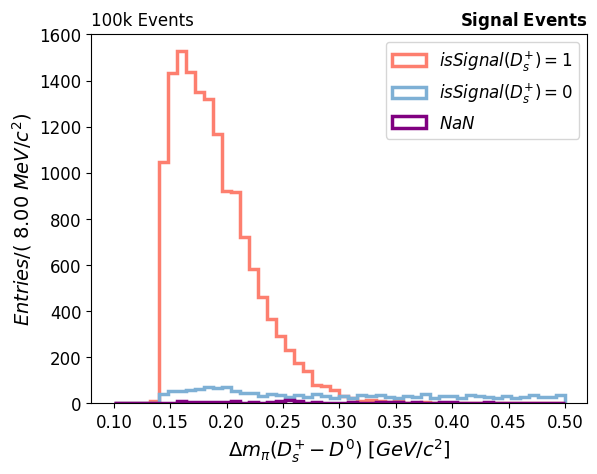


Signal km3pi, Ds_diff_D0pi, Width Per Bin: 8.00 MeV


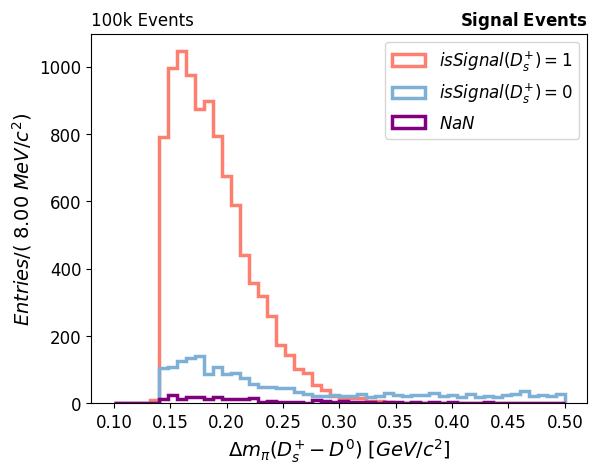


Signal kmpippi0_eff20_May2020, Ds_diff_D0pi, Width Per Bin: 8.00 MeV


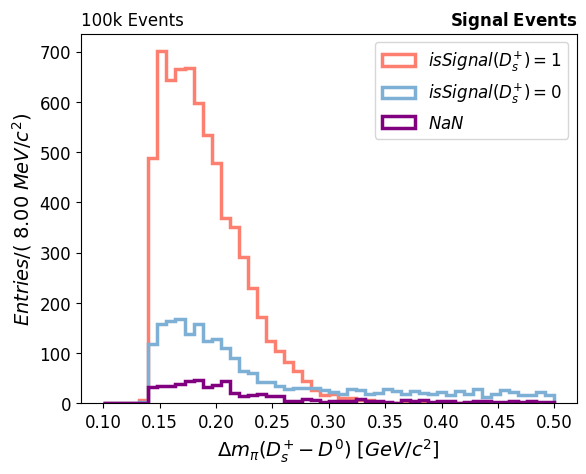

In [26]:
Bins = 50
Density = False
Stacked = False

# Plot Signal - Ds_diff_D0pi (Δm_π)
Range = [0.1, 0.5]
var = 'Ds_diff_D0pi'

for mode in decay_config.keys():
    perBin = ((Range[1] - Range[0]) / Bins) * 1000
    print(f"\nSignal {mode}, {var}, Width Per Bin: {perBin:.2f} MeV")

    df = DataFrames[f"Signal_{mode}"].copy()

    mask_sig  = df["Ds_isSignal"] == 1
    mask_bkg  = df["Ds_isSignal"] == 0
    mask_nan  = df["Ds_isSignal"].isna()

    data = [
        df[mask_sig][var],   # true Ds signal
        df[mask_bkg][var],   # reconstructed Ds but not truth signal
        df[mask_nan][var],   # no truth match
    ]

    labels = [
        r'$isSignal(D_s^{+}) = 1$',
        r'$isSignal(D_s^{+}) = 0$',
        r'$NaN$'
    ]
    colors = ['#fd7f6f', '#7eb0d5', 'purple']

    plt.hist(
        data[::-1],
        color=colors[::-1],
        label=labels[::-1],
        alpha=1,
        range=Range,
        stacked=Stacked,
        density=Density,
        bins=Bins,
        histtype='step',
        linewidth=2.5
    )

    plt.title(f'100k Events', loc="left")
    plt.title(r'$\bf Signal\;Events$', loc="right")
    plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width=perBin))
    plt.xlabel(r'$\Delta m_{\pi}(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
    plt.legend()
    plt.show()


Signal kmpip, Ds_massDifference_0, Width Per Bin: 5.00 MeV


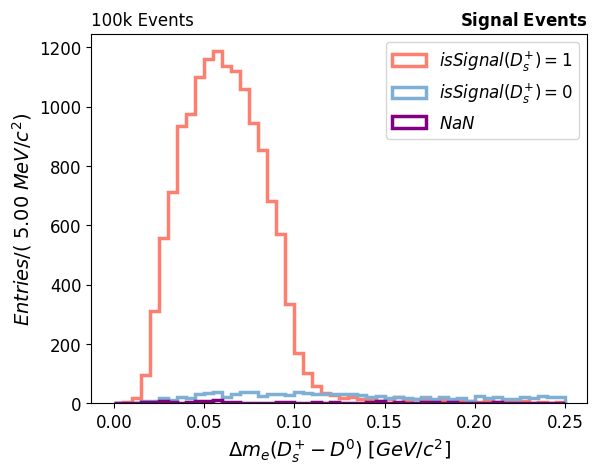


Signal km3pi, Ds_massDifference_0, Width Per Bin: 5.00 MeV


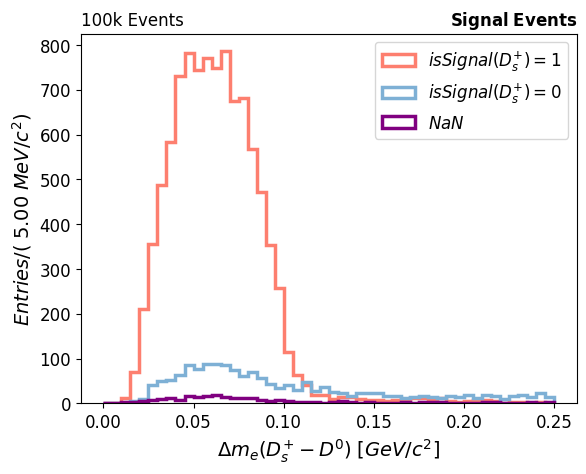


Signal kmpippi0_eff20_May2020, Ds_massDifference_0, Width Per Bin: 5.00 MeV


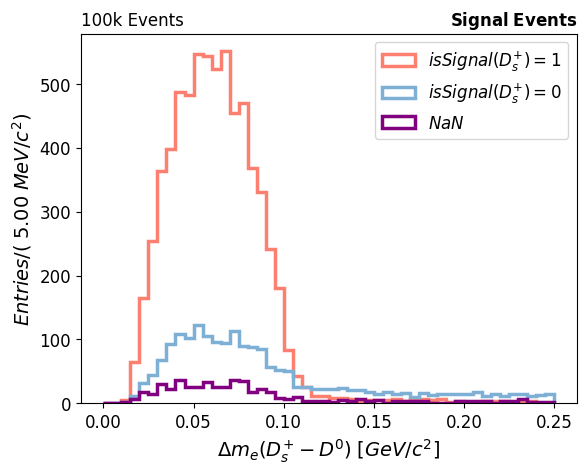

In [28]:
# Plot Signal - Ds_massDifference_0 (Δm_e)
Bins = 50
Density = False
Stacked = False
Range = [0.0, 0.25]
var = 'Ds_massDifference_0'

for mode in decay_config.keys():
    perBin = ((Range[1] - Range[0]) / Bins) * 1000
    print(f"\nSignal {mode}, {var}, Width Per Bin: {perBin:.2f} MeV")

    df = DataFrames[f"Signal_{mode}"].copy()

    mask_sig  = df["Ds_isSignal"] == 1
    mask_bkg  = df["Ds_isSignal"] == 0
    mask_nan  = df["Ds_isSignal"].isna()

    data = [
        df[mask_sig][var],
        df[mask_bkg][var],
        df[mask_nan][var],
    ]

    labels = [
        r'$isSignal(D_s^{+}) = 1$',
        r'$isSignal(D_s^{+}) = 0$',
        r'$NaN$'
    ]
    colors = ['#fd7f6f', '#7eb0d5', 'purple']

    plt.hist(
        data[::-1],
        color=colors[::-1],
        label=labels[::-1],
        alpha=1,
        range=Range,
        stacked=Stacked,
        density=Density,
        bins=Bins,
        histtype='step',
        linewidth=2.5
    )

    plt.title(f'100k Events', loc="left")
    plt.title(r'$\bf Signal\;Events$', loc="right")
    plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width=perBin))
    plt.xlabel(r'$\Delta m_e(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
    plt.legend()
    plt.show()


## Background composition by sample (per mode), no signal overlay, no gamma veto


Background composition for Ds_massDifference_0 in mode kmpip
  Width Per Bin: 5.00 MeV
  N_bkg total = 351780
    ccbar   : 311413 (88.5%)
    charged : 2167 (0.6%)
    mixed   : 928 (0.3%)
    uds     : 37272 (10.6%)


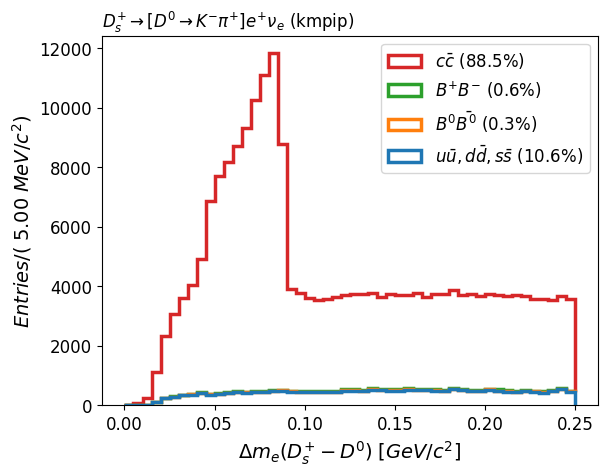


Background composition for Ds_massDifference_0 in mode km3pi
  Width Per Bin: 5.00 MeV
  N_bkg total = 809611
    ccbar   : 641201 (79.2%)
    charged : 20919 (2.6%)
    mixed   : 17847 (2.2%)
    uds     : 129644 (16.0%)


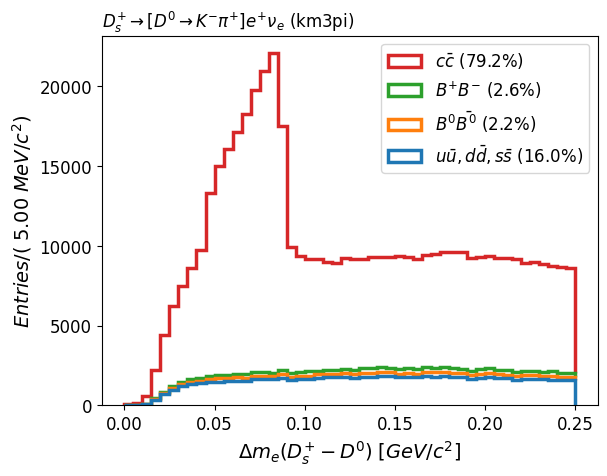


Background composition for Ds_massDifference_0 in mode kmpippi0_eff20_May2020
  Width Per Bin: 5.00 MeV
  N_bkg total = 1264482
    ccbar   : 884012 (69.9%)
    charged : 35976 (2.8%)
    mixed   : 21497 (1.7%)
    uds     : 322997 (25.5%)


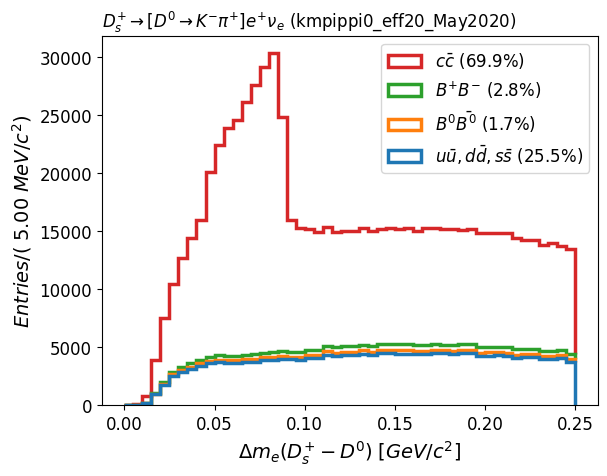


Background composition for Ds_diff_D0pi in mode kmpip
  Width Per Bin: 8.00 MeV
  N_bkg total = 351780
    ccbar   : 311413 (88.5%)
    charged : 2167 (0.6%)
    mixed   : 928 (0.3%)
    uds     : 37272 (10.6%)


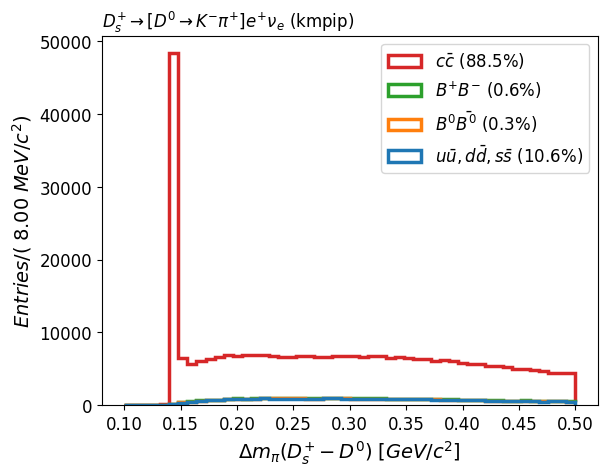


Background composition for Ds_diff_D0pi in mode km3pi
  Width Per Bin: 8.00 MeV
  N_bkg total = 809611
    ccbar   : 641201 (79.2%)
    charged : 20919 (2.6%)
    mixed   : 17847 (2.2%)
    uds     : 129644 (16.0%)


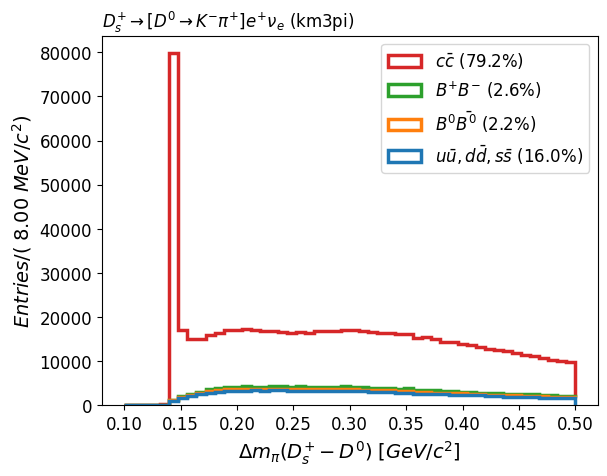


Background composition for Ds_diff_D0pi in mode kmpippi0_eff20_May2020
  Width Per Bin: 8.00 MeV
  N_bkg total = 1264482
    ccbar   : 884012 (69.9%)
    charged : 35976 (2.8%)
    mixed   : 21497 (1.7%)
    uds     : 322997 (25.5%)


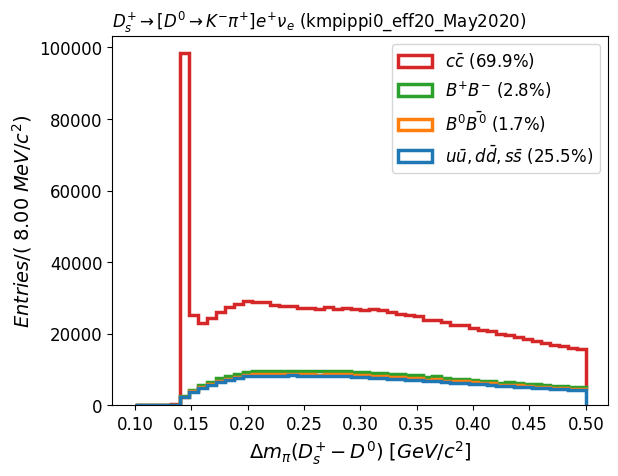

In [29]:
Stacked = True
Density = False
Bins = 50

def plot_bkg_composition(var, var_label, var_range):
    for mode in decay_config.keys():
        print(f"\n{'='*80}")
        print(f"Background composition for {var} in mode {mode}")
        print('='*80)

        # per-mode dataframes
        df_ccbar   = DataFrames[f"ccbar_{mode}"]
        df_charged = DataFrames[f"charged_{mode}"]
        df_mixed   = DataFrames[f"mixed_{mode}"]
        df_ddbar   = DataFrames[f"ddbar_{mode}"]
        df_ssbar   = DataFrames[f"ssbar_{mode}"]
        df_uubar   = DataFrames[f"uubar_{mode}"]

        # merge light quark samples into uds
        df_uds = pd.concat([df_uubar, df_ddbar, df_ssbar], ignore_index=True)

        # no gamma veto here: just drop NaNs in the plotted variable
        ccbar_vals   = df_ccbar[var].dropna()
        charged_vals = df_charged[var].dropna()
        mixed_vals   = df_mixed[var].dropna()
        uds_vals     = df_uds[var].dropna()

        # total background counts for fractions
        n_ccbar   = len(ccbar_vals)
        n_charged = len(charged_vals)
        n_mixed   = len(mixed_vals)
        n_uds     = len(uds_vals)

        n_bkg_tot = n_ccbar + n_charged + n_mixed + n_uds
        if n_bkg_tot == 0:
            print("  No background entries for this variable/mode, skipping.")
            continue

        frac_ccbar   = 100.0 * n_ccbar   / n_bkg_tot
        frac_charged = 100.0 * n_charged / n_bkg_tot
        frac_mixed   = 100.0 * n_mixed   / n_bkg_tot
        frac_uds     = 100.0 * n_uds     / n_bkg_tot

        perBin = ((var_range[1] - var_range[0]) / Bins) * 1000
        print(f"  Width Per Bin: {perBin:.2f} MeV")
        print(f"  N_bkg total = {n_bkg_tot}")
        print(f"    ccbar   : {n_ccbar} ({frac_ccbar:.1f}%)")
        print(f"    charged : {n_charged} ({frac_charged:.1f}%)")
        print(f"    mixed   : {n_mixed} ({frac_mixed:.1f}%)")
        print(f"    uds     : {n_uds} ({frac_uds:.1f}%)")

        labels = [
            r'$c\bar{{c}}$' + f' ({frac_ccbar:.1f}%)',
            r'$B^{+} B^{-}$' + f' ({frac_charged:.1f}%)',
            r'$B^{0} \bar{B^{0}}$' + f' ({frac_mixed:.1f}%)',
            r'$u \bar{u}, d \bar{d}, s \bar{s}$' + f' ({frac_uds:.1f}%)'
        ]

        data = [ccbar_vals, charged_vals, mixed_vals, uds_vals]

        plt.hist(
            data[::-1],
            label=labels[::-1],
            density=Density,
            stacked=Stacked,
            bins=Bins,
            alpha=1,
            histtype='step',
            linewidth=2.5,
            range=var_range
        )

        plt.title(r'$D_s^{+} \rightarrow [D^{0} \rightarrow K^{-} \pi^{+}] e^{+} \nu_{e}$'
                  + f' ({mode})',
                  loc="left")
        plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width=perBin))
        plt.xlabel(var_label)
        plt.legend()
        plt.show()


# %% 
# Call for Ds_massDifference_0 (Δm_e) and Ds_diff_D0pi (Δm_π)

plot_bkg_composition(
    var='Ds_massDifference_0',
    var_label=r'$\Delta m_e(D_s^{+} - D^{0})\;[GeV/c^{2}]$',
    var_range=[0.0, 0.25]
)

plot_bkg_composition(
    var='Ds_diff_D0pi',
    var_label=r'$\Delta m_{\pi}(D_s^{+} - D^{0})\;[GeV/c^{2}]$',
    var_range=[0.1, 0.5]
)


  ### Background Plots (D* categories, no gamma veto)


Background kmpip, Ds_diff_D0pi, Width Per Bin: 12.00 MeV


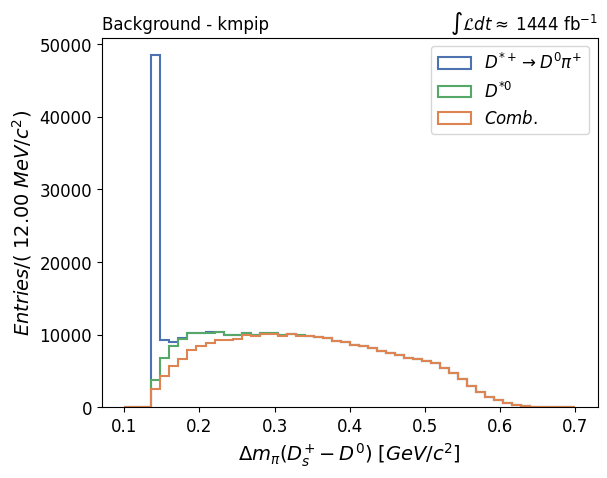


Background km3pi, Ds_diff_D0pi, Width Per Bin: 12.00 MeV


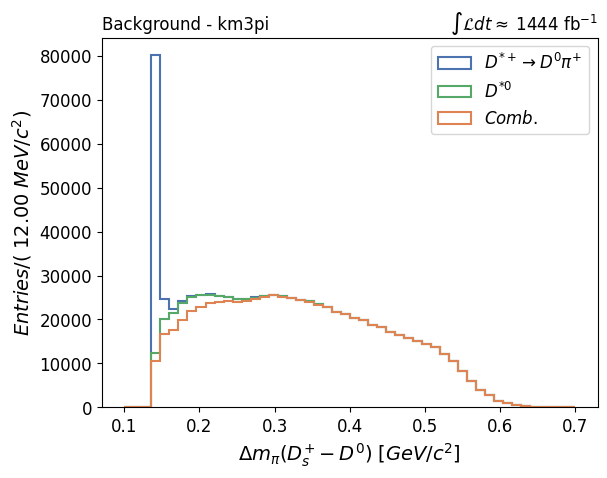


Background kmpippi0_eff20_May2020, Ds_diff_D0pi, Width Per Bin: 12.00 MeV


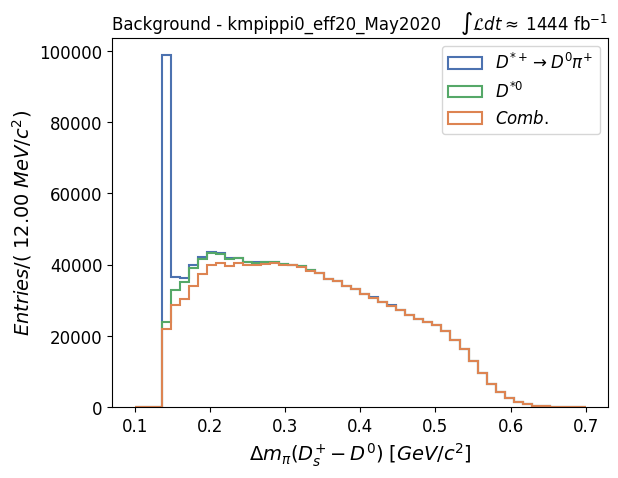

In [14]:
Bins = 50
Density = False
Stacked = True
Range = [0.1, 0.7]
var = 'Ds_diff_D0pi'

for mode in decay_config.keys():
    perBin = ((Range[1] - Range[0]) / Bins) * 1000
    print(f"\nBackground {mode}, {var}, Width Per Bin: {perBin:.2f} MeV")

    df = DataFrames[f"All_{mode}"].copy()

    if USE_4_CATEGORIES:
        label1 = r'$Comb.$'
        label2 = r'$NaN$'
        label3 = r'$D^{*0}$'
        label4 = r'$D^{*+} \rightarrow D^{0} \pi^{+}$'

        labels = [label1, label2, label3, label4]
        colors = ["#DD8452", "#C44E52", "#55A868", "#4C72B0"]

        data = [
            df[(abs(df["Ds_mcPDG"]) != 413) &
               (abs(df["Ds_mcPDG"]) != 423) &
               (~df["Ds_mcPDG"].isna())][var],
            df[df["Ds_mcPDG"].isna()][var],
            df[abs(df["Ds_mcPDG"]) == 423][var],
            df[abs(df["Ds_mcPDG"]) == 413][var]
        ]
    else:  # 3 categories
        label1 = r'$Comb.$'
        label2 = r'$D^{*0}$'
        label3 = r'$D^{*+} \rightarrow D^{0} \pi^{+}$'

        labels = [label1, label2, label3]
        colors = ["#DD8452", "#55A868", "#4C72B0"]

        data = [
            df[(abs(df["Ds_mcPDG"]) != 413) &
               (abs(df["Ds_mcPDG"]) != 423)][var],
            df[abs(df["Ds_mcPDG"]) == 423][var],
            df[abs(df["Ds_mcPDG"]) == 413][var]
        ]

    plt.hist(
        data,
        color=colors,
        label=labels,
        density=Density,
        stacked=Stacked,
        bins=Bins,
        alpha=1,
        histtype='step',
        linewidth=1.5,
        range=Range
    )

    plt.title(f'Background - {mode}', loc="left")
    plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
    plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width=perBin))
    plt.xlabel(r'$\Delta m_{\pi}(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
    plt.legend(loc='upper right')
    plt.show()


Background kmpip, Ds_massDifference_0, Width Per Bin: 5.00 MeV


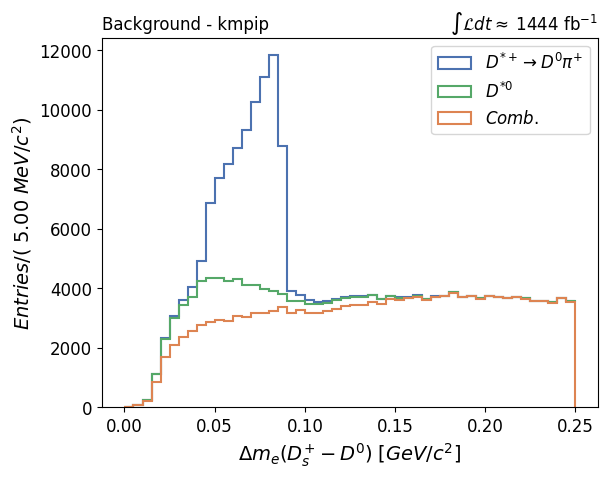


Background km3pi, Ds_massDifference_0, Width Per Bin: 5.00 MeV


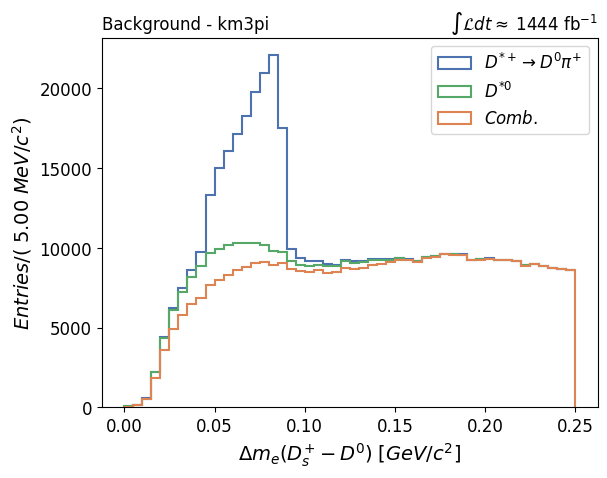


Background kmpippi0_eff20_May2020, Ds_massDifference_0, Width Per Bin: 5.00 MeV


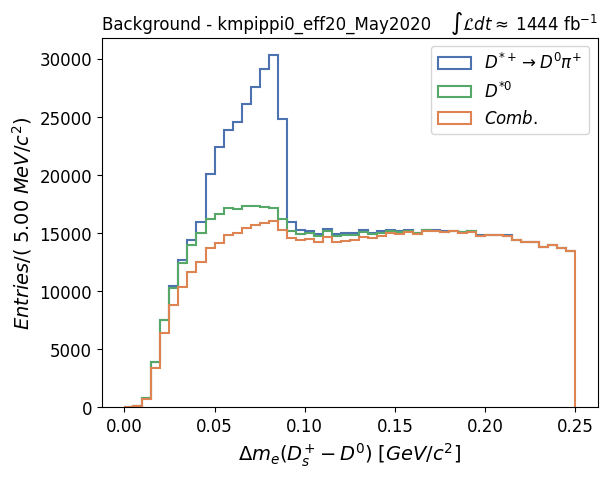

In [15]:
Bins = 50
Density = False
Stacked = True
Range = [0.0, 0.25]
var = 'Ds_massDifference_0'

for mode in decay_config.keys():
    perBin = ((Range[1] - Range[0]) / Bins) * 1000
    print(f"\nBackground {mode}, {var}, Width Per Bin: {perBin:.2f} MeV")

    df = DataFrames[f"All_{mode}"].copy()

    if USE_4_CATEGORIES:
        label1 = r'$Comb.$'
        label2 = r'$NaN$'
        label3 = r'$D^{*0}$'
        label4 = r'$D^{*+} \rightarrow D^{0} \pi^{+}$'

        labels = [label1, label2, label3, label4]
        colors = ["#DD8452", "#C44E52", "#55A868", "#4C72B0"]

        data = [
            df[(abs(df["Ds_mcPDG"]) != 413) &
               (abs(df["Ds_mcPDG"]) != 423) &
               (~df["Ds_mcPDG"].isna())][var],
            df[df["Ds_mcPDG"].isna()][var],
            df[abs(df["Ds_mcPDG"]) == 423][var],
            df[abs(df["Ds_mcPDG"]) == 413][var]
        ]
    else:  # 3 categories
        label1 = r'$Comb.$'
        label2 = r'$D^{*0}$'
        label3 = r'$D^{*+} \rightarrow D^{0} \pi^{+}$'

        labels = [label1, label2, label3]
        colors = ["#DD8452", "#55A868", "#4C72B0"]

        data = [
            df[(abs(df["Ds_mcPDG"]) != 413) &
               (abs(df["Ds_mcPDG"]) != 423)][var],
            df[abs(df["Ds_mcPDG"]) == 423][var],
            df[abs(df["Ds_mcPDG"]) == 413][var]
        ]

    plt.hist(
        data,
        color=colors,
        label=labels,
        density=Density,
        stacked=Stacked,
        bins=Bins,
        alpha=1,
        histtype='step',
        linewidth=1.5,
        range=Range
    )

    plt.title(f'Background - {mode}', loc="left")
    plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
    plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width=perBin))
    plt.xlabel(r'$\Delta m_e(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
    plt.legend(loc='upper right')
    plt.show()

  # DEEP ANALYSIS: Δm_e vs Δm_π SANITY CHECKS (no veto, no gamma veto)

  * **Δm_e** = `Ds_massDifference_0` (electron mass on lepton track)
  * **Δm_π** = `Ds_diff_D0pi` (pion mass on same track)
  * Signal: |Ds_mcPDG| = 431
  * Bkg1: |Ds_mcPDG| = 413 (D*+)
  * Bkg2: |Ds_mcPDG| = 423 (D*0)
  * Bkg3: everything else (combinatorial)


2D Structure (Δm_e, Δm_π) - kmpip


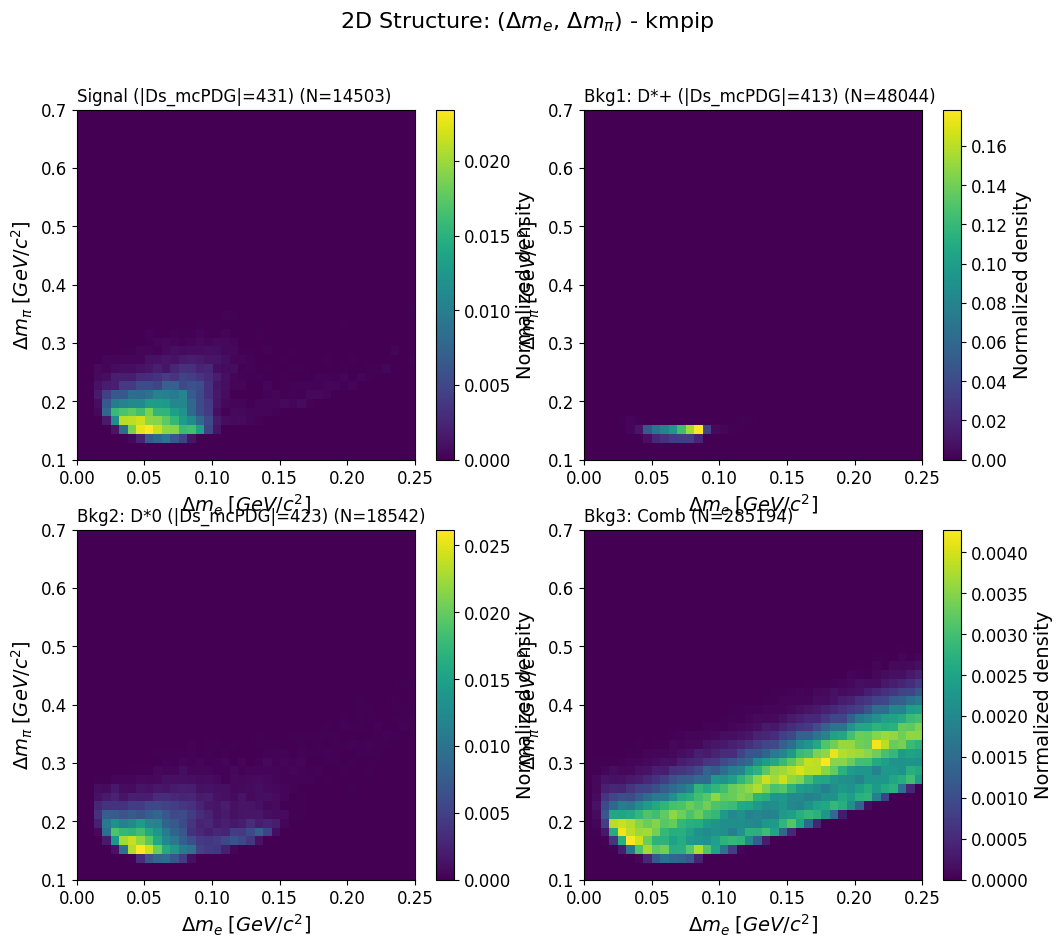


2D Structure (Δm_e, Δm_π) - km3pi


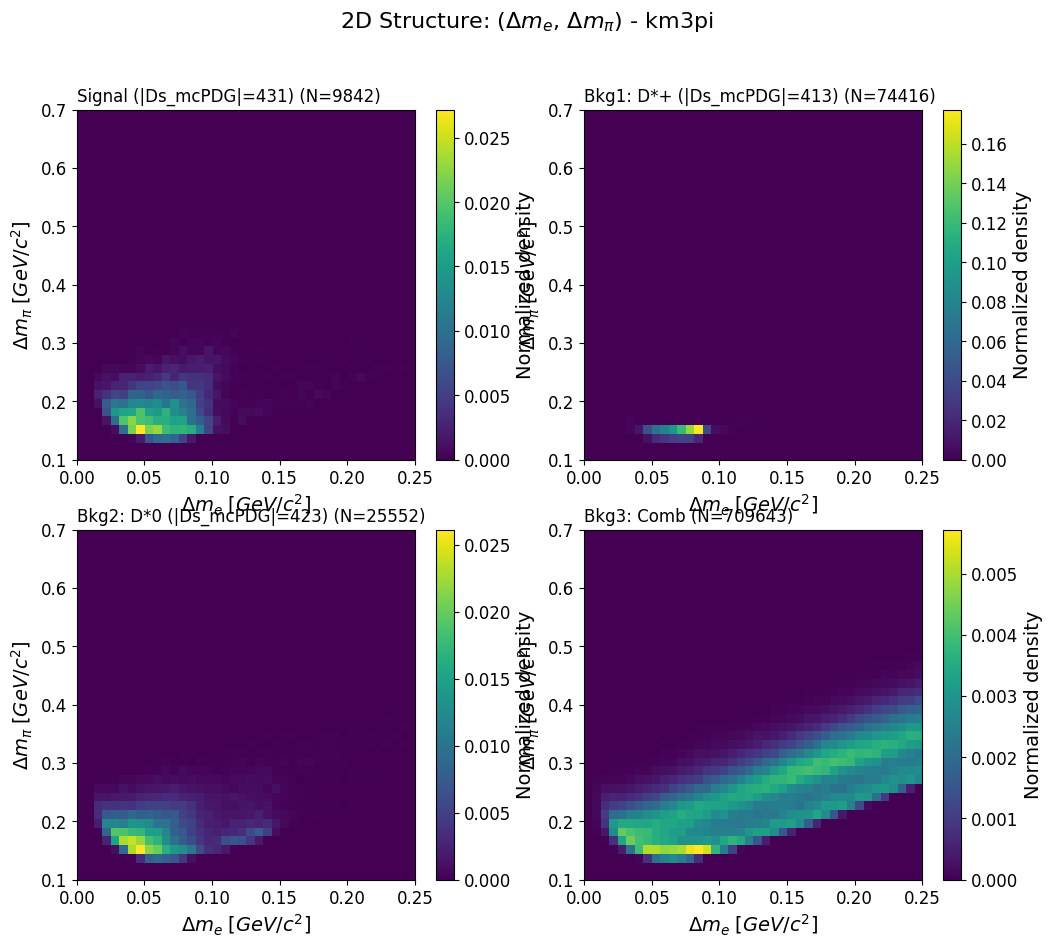


2D Structure (Δm_e, Δm_π) - kmpippi0_eff20_May2020


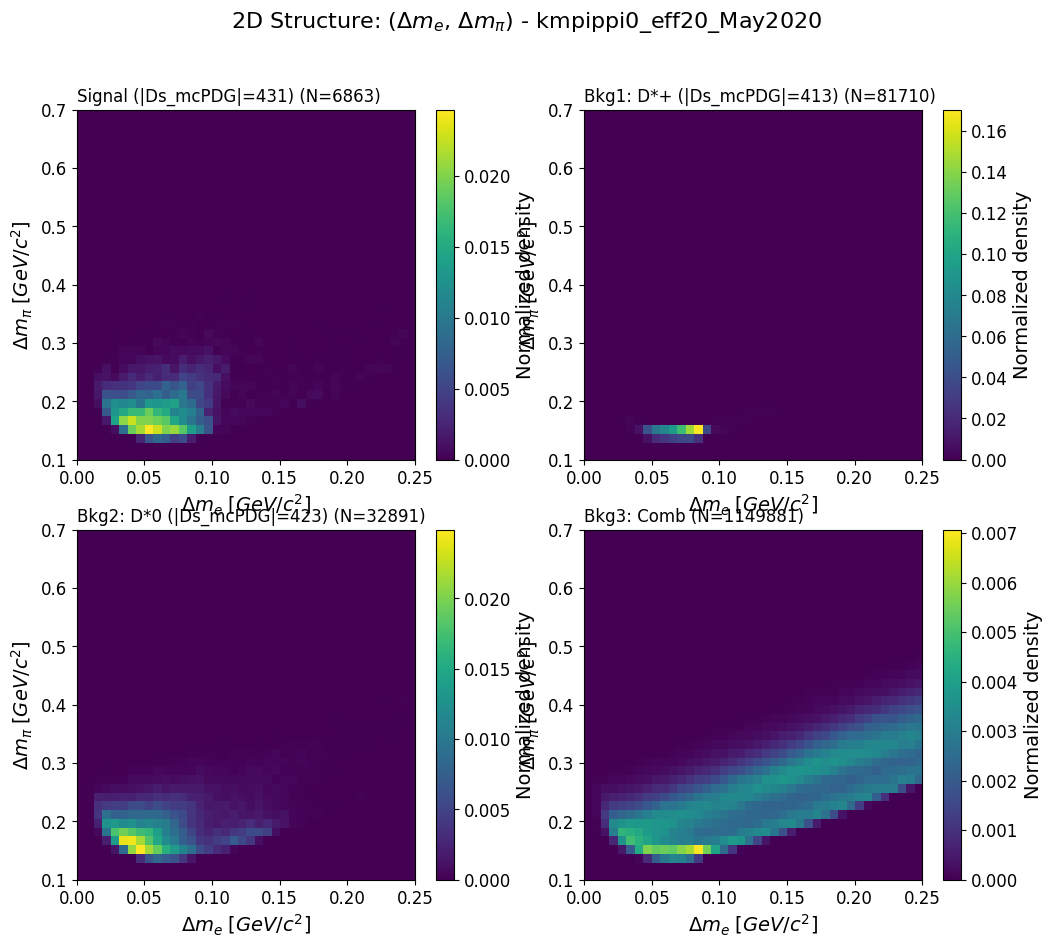

In [16]:
bins_2d = [40, 40]
range_2d = [[0.0, 0.25], [0.10, 0.70]]  # [Δm_e, Δm_π]

for mode in decay_config.keys():
    print(f"\n{'='*80}")
    print(f"2D Structure (Δm_e, Δm_π) - {mode}")
    print('='*80)

    df_sig = DataFrames[f"Signal_{mode}"].copy()
    df_bkg = DataFrames[f"All_{mode}"].copy()

    sig_mask = abs(df_sig['Ds_mcPDG']) == 431
    df_sig = df_sig[sig_mask]

    bkg1 = df_bkg[abs(df_bkg['Ds_mcPDG']) == 413].copy()
    bkg2 = df_bkg[abs(df_bkg['Ds_mcPDG']) == 423].copy()
    bkg3 = df_bkg[(abs(df_bkg['Ds_mcPDG']) != 413) &
                  (abs(df_bkg['Ds_mcPDG']) != 423)].copy()

    datasets = {
        'Signal (|Ds_mcPDG|=431)': df_sig,
        'Bkg1: D*+ (|Ds_mcPDG|=413)': bkg1,
        'Bkg2: D*0 (|Ds_mcPDG|=423)': bkg2,
        'Bkg3: Comb': bkg3
    }

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for idx, (name, df) in enumerate(datasets.items()):
        if len(df) == 0:
            axes[idx].set_title(f'{name} (N=0)')
            continue

        H, xedges, yedges = np.histogram2d(
            df['Ds_massDifference_0'],  # Δm_e
            df['Ds_diff_D0pi'],         # Δm_π
            bins=bins_2d,
            range=range_2d
        )

        total = np.sum(H)
        if total > 0:
            H = H / total

        im = axes[idx].imshow(
            H.T,
            origin='lower',
            aspect='auto',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
            cmap='viridis',
            interpolation='nearest'
        )

        axes[idx].set_xlabel(r'$\Delta m_e\;[GeV/c^{2}]$')
        axes[idx].set_ylabel(r'$\Delta m_\pi\;[GeV/c^{2}]$')
        axes[idx].set_title(f'{name} (N={len(df)})', loc='left')
        plt.colorbar(im, ax=axes[idx], label='Normalized density')

    plt.suptitle(f'2D Structure: ($\\Delta m_e$, $\\Delta m_\\pi$) - {mode}', fontsize=16)
    plt.show()

In [17]:
# # %% [markdown]
# # ## Helper: D0 daughter column mapping per mode

# # %%
# daughter_map = {
#     'kmpip': [
#         ('K_Ch1',  'K_Ch1_mcPDG',  'K_Ch1_genMotherPDG'),
#         ('pi_Ch1', 'pi_Ch1_mcPDG', 'pi_Ch1_genMotherPDG'),
#     ],
#     'kmpippi0_eff20_May2020': [
#         ('K_Ch2',   'K_Ch2_mcPDG',   'K_Ch2_genMotherPDG'),
#         ('pi_Ch2',  'pi_Ch2_mcPDG',  'pi_Ch2_genMotherPDG'),
#         ('pi0_Ch2', 'pi0_Ch2_mcPDG', 'pi0_Ch2_genMotherPDG'),
#     ],
#     'km3pi': [
#         ('K_Ch3',   'K_Ch3_mcPDG',   'K_Ch3_genMotherPDG'),
#         ('pi1_Ch3', 'pi1_Ch3_mcPDG', 'pi1_Ch3_genMotherPDG'),
#         ('pi2_Ch3', 'pi2_Ch3_mcPDG', 'pi2_Ch3_genMotherPDG'),
#         ('pi3_Ch3', 'pi3_Ch3_mcPDG', 'pi3_Ch3_genMotherPDG'),
#     ],
# }

# N_TOP = 5   # how many PDG categories to plot per variable
# Bins  = 50
# Range = [0.0, 0.25]
# var   = 'Ds_massDifference_0'


In [18]:
# # %% [markdown]
# # ## Electron mcPDG: top |e_mcPDG| categories in |Ds_mcPDG| == 23 (Signal)

# # %%
# for mode in decay_config.keys():
#     print(f"\n{'='*80}")
#     print(f'Electron mcPDG categories in |Ds_mcPDG| == 23, Signal_{mode}')
#     print('='*80)

#     df_sig = DataFrames[f"Signal_{mode}"].copy()
#     if 'e_mcPDG' not in df_sig.columns:
#         print("  No e_mcPDG column, skipping.")
#         continue

#     ds_abs = abs(df_sig['Ds_mcPDG'])
#     df_23  = df_sig[ds_abs == 23].copy()
#     print(f"  Total rows with |Ds_mcPDG| == 23: {len(df_23)}")
#     if len(df_23) == 0:
#         continue

#     # value counts
#     vc = abs(df_23['e_mcPDG']).value_counts(dropna=False)
#     print("\n  |e_mcPDG| value counts (normalized):")
#     print((vc / vc.sum()).head(15).apply(lambda x: f"{x:.6f}"))

#     # choose top N_TOP PDG codes (excluding NaN)
#     top_codes = [c for c in vc.index if not pd.isna(c)][:N_TOP]
#     print(f"\n  Top {len(top_codes)} |e_mcPDG| codes to plot:", top_codes)

#     # plot Δm_e shapes
#     plt.figure()
#     perBin = ((Range[1] - Range[0]) / Bins) * 1000
#     print(f"  Δm_e bin width: {perBin:.2f} MeV")

#     for code in top_codes:
#         subset = df_23[abs(df_23['e_mcPDG']) == code][var].dropna()
#         if len(subset) == 0:
#             continue
#         counts, edges = np.histogram(subset, bins=Bins, range=Range)
#         centers = 0.5 * (edges[:-1] + edges[1:])
#         plt.step(centers, counts, where='mid', linewidth=1.5,
#                  label=f'|e_mcPDG|={int(code)} (N={len(subset)})')

#     plt.xlabel(r'$\Delta m_e(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
#     plt.ylabel('Entries / bin')
#     plt.title(f'e_mcPDG categories, |Ds_mcPDG|=23, Signal_{mode}', loc='left')
#     plt.legend()
#     plt.show()


In [19]:
# # %% [markdown]
# # ## Electron genMotherPDG: top |e_genMotherPDG| in |Ds_mcPDG| == 23 (Signal)

# # %%
# for mode in decay_config.keys():
#     print(f"\n{'='*80}")
#     print(f'Electron genMotherPDG in |Ds_mcPDG| == 23, Signal_{mode}')
#     print('='*80)

#     df_sig = DataFrames[f"Signal_{mode}"].copy()
#     if 'e_genMotherPDG' not in df_sig.columns:
#         print("  No e_genMotherPDG column, skipping.")
#         continue

#     ds_abs = abs(df_sig['Ds_mcPDG'])
#     df_23  = df_sig[ds_abs == 23].copy()
#     print(f"  Total rows with |Ds_mcPDG| == 23: {len(df_23)}")
#     if len(df_23) == 0:
#         continue

#     vc = abs(df_23['e_genMotherPDG']).value_counts(dropna=False)
#     print("\n  |e_genMotherPDG| value counts (normalized):")
#     print((vc / vc.sum()).head(15).apply(lambda x: f"{x:.6f}"))

#     top_codes = [c for c in vc.index if not pd.isna(c)][:N_TOP]
#     print(f"\n  Top {len(top_codes)} |e_genMotherPDG| codes to plot:", top_codes)

#     plt.figure()
#     perBin = ((Range[1] - Range[0]) / Bins) * 1000
#     print(f"  Δm_e bin width: {perBin:.2f} MeV")

#     for code in top_codes:
#         subset = df_23[abs(df_23['e_genMotherPDG']) == code][var].dropna()
#         if len(subset) == 0:
#             continue
#         counts, edges = np.histogram(subset, bins=Bins, range=Range)
#         centers = 0.5 * (edges[:-1] + edges[1:])
#         plt.step(centers, counts, where='mid', linewidth=1.5,
#                  label=f'|e_genMotherPDG|={int(code)} (N={len(subset)})')

#     plt.xlabel(r'$\Delta m_e(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
#     plt.ylabel('Entries / bin')
#     plt.title(f'e_genMotherPDG categories, |Ds_mcPDG|=23, Signal_{mode}', loc='left')
#     plt.legend()
#     plt.show()


In [20]:
# # %% [markdown]
# # ## D0 daughters: mcPDG categories in |Ds_mcPDG| == 23 (Signal)

# # %%
# for mode in decay_config.keys():
#     print(f"\n{'='*80}")
#     print(f'D0 daughter mcPDG in |Ds_mcPDG| == 23, Signal_{mode}')
#     print('='*80)

#     if mode not in daughter_map:
#         print("  No daughter mapping defined for this mode.")
#         continue

#     df_sig = DataFrames[f"Signal_{mode}"].copy()
#     ds_abs = abs(df_sig['Ds_mcPDG'])
#     df_23  = df_sig[ds_abs == 23].copy()
#     print(f"  Total rows with |Ds_mcPDG| == 23: {len(df_23)}")
#     if len(df_23) == 0:
#         continue

#     for label, mc_col, mom_col in daughter_map[mode]:
#         print(f"\n  Daughter: {label}")
#         if mc_col not in df_23.columns:
#             print(f"    Column {mc_col} not found, skipping.")
#             continue

#         vc = abs(df_23[mc_col]).value_counts(dropna=False)
#         if vc.sum() == 0:
#             print("    No entries for this daughter.")
#             continue

#         print(f"    |{mc_col}| value counts (normalized):")
#         print((vc / vc.sum()).head(15).apply(lambda x: f"{x:.6f}"))

#         top_codes = [c for c in vc.index if not pd.isna(c)][:N_TOP]
#         print(f"    Top {len(top_codes)} |{mc_col}| codes to plot:", top_codes)

#         plt.figure()
#         perBin = ((Range[1] - Range[0]) / Bins) * 1000
#         print(f"    Δm_e bin width: {perBin:.2f} MeV")

#         for code in top_codes:
#             subset = df_23[abs(df_23[mc_col]) == code][var].dropna()
#             if len(subset) == 0:
#                 continue
#             counts, edges = np.histogram(subset, bins=Bins, range=Range)
#             centers = 0.5 * (edges[:-1] + edges[1:])
#             plt.step(centers, counts, where='mid', linewidth=1.5,
#                      label=f'|{mc_col}|={int(code)} (N={len(subset)})')

#         plt.xlabel(r'$\Delta m_e(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
#         plt.ylabel('Entries / bin')
#         plt.title(f'{label} mcPDG, |Ds_mcPDG|=23, Signal_{mode}', loc='left')
#         plt.legend()
#         plt.show()


In [21]:
# # %% [markdown]
# # ## D0 daughters: genMotherPDG categories in |Ds_mcPDG| == 23 (Signal)

# # %%
# for mode in decay_config.keys():
#     print(f"\n{'='*80}")
#     print(f'D0 daughter genMotherPDG in |Ds_mcPDG| == 23, Signal_{mode}')
#     print('='*80)

#     if mode not in daughter_map:
#         print("  No daughter mapping defined for this mode.")
#         continue

#     df_sig = DataFrames[f"Signal_{mode}"].copy()
#     ds_abs = abs(df_sig['Ds_mcPDG'])
#     df_23  = df_sig[ds_abs == 23].copy()
#     print(f"  Total rows with |Ds_mcPDG| == 23: {len(df_23)}")
#     if len(df_23) == 0:
#         continue

#     for label, mc_col, mom_col in daughter_map[mode]:
#         print(f"\n  Daughter: {label}")
#         if mom_col not in df_23.columns:
#             print(f"    Column {mom_col} not found, skipping.")
#             continue

#         vc = abs(df_23[mom_col]).value_counts(dropna=False)
#         if vc.sum() == 0:
#             print("    No entries for this daughter.")
#             continue

#         print(f"    |{mom_col}| value counts (normalized):")
#         print((vc / vc.sum()).head(15).apply(lambda x: f"{x:.6f}"))

#         top_codes = [c for c in vc.index if not pd.isna(c)][:N_TOP]
#         print(f"    Top {len(top_codes)} |{mom_col}| codes to plot:", top_codes)

#         plt.figure()
#         perBin = ((Range[1] - Range[0]) / Bins) * 1000
#         print(f"    Δm_e bin width: {perBin:.2f} MeV")

#         for code in top_codes:
#             subset = df_23[abs(df_23[mom_col]) == code][var].dropna()
#             if len(subset) == 0:
#                 continue
#             counts, edges = np.histogram(subset, bins=Bins, range=Range)
#             centers = 0.5 * (edges[:-1] + edges[1:])
#             plt.step(centers, counts, where='mid', linewidth=1.5,
#                      label=f'|{mom_col}|={int(code)} (N={len(subset)})')

#         plt.xlabel(r'$\Delta m_e(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
#         plt.ylabel('Entries / bin')
#         plt.title(f'{label} genMotherPDG, |Ds_mcPDG|=23, Signal_{mode}', loc='left')
#         plt.legend()
#         plt.show()


In [22]:
# # %% [markdown]
# # ## D0 daughters: mcMother_nMCDaughters, genMotherPDG_1, genMotherPDG_2
# # ## inside |Ds_mcPDG| == 23 (Signal only)

# # %%
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # how many categories to plot per variable
# N_TOP = 5
# Bins = 50
# Range = [0.0, 0.25]
# var = 'Ds_massDifference_0'

# # mapping of daughters and the extra truth columns
# daughter_mother_map = {
#     'kmpip': [
#         ('K_Ch1',
#          'K_Ch1_mcMother_nMCDaughters',
#          'K_Ch1_genMotherPDG_1',
#          'K_Ch1_genMotherPDG_2'),
#         ('pi_Ch1',
#          'pi_Ch1_mcMother_nMCDaughters',
#          'pi_Ch1_genMotherPDG_1',
#          'pi_Ch1_genMotherPDG_2'),
#     ],
#     'kmpippi0_eff20_May2020': [
#         ('K_Ch2',
#          'K_Ch2_mcMother_nMCDaughters',
#          'K_Ch2_genMotherPDG_1',
#          'K_Ch2_genMotherPDG_2'),
#         ('pi_Ch2',
#          'pi_Ch2_mcMother_nMCDaughters',
#          'pi_Ch2_genMotherPDG_1',
#          'pi_Ch2_genMotherPDG_2'),
#         ('pi0_Ch2',
#          'pi0_Ch2_mcMother_nMCDaughters',
#          'pi0_Ch2_genMotherPDG_1',
#          'pi0_Ch2_genMotherPDG_2'),
#     ],
#     'km3pi': [
#         ('K_Ch3',
#          'K_Ch3_mcMother_nMCDaughters',
#          'K_Ch3_genMotherPDG_1',
#          'K_Ch3_genMotherPDG_2'),
#         ('pi1_Ch3',
#          'pi1_Ch3_mcMother_nMCDaughters',
#          'pi1_Ch3_genMotherPDG_1',
#          'pi1_Ch3_genMotherPDG_2'),
#         ('pi2_Ch3',
#          'pi2_Ch3_mcMother_nMCDaughters',
#          'pi2_Ch3_genMotherPDG_1',
#          'pi2_Ch3_genMotherPDG_2'),
#         ('pi3_Ch3',
#          'pi3_Ch3_mcMother_nMCDaughters',
#          'pi3_Ch3_genMotherPDG_1',
#          'pi3_Ch3_genMotherPDG_2'),
#     ],
# }


# def plot_dm_by_category(df_23, colname, mode, label_prefix):
#     """For a given column and mode, print value counts and plot Δm_e per top category."""
#     if colname not in df_23.columns:
#         print(f"    Column {colname} not found, skipping.")
#         return

#     # PDG-like vs nMCDaughters: treat counts without abs, PDG with abs
#     if colname.endswith('nMCDaughters'):
#         vc = df_23[colname].value_counts(dropna=False)
#         selector = lambda code: (df_23[colname] == code)
#         print_type = f"{colname} (nMCDaughters)"
#     else:
#         vc = abs(df_23[colname]).value_counts(dropna=False)
#         selector = lambda code: (abs(df_23[colname]) == code)
#         print_type = f"|{colname}|"

#     if vc.sum() == 0:
#         print(f"    No entries for {colname}.")
#         return

#     print(f"    {print_type} value counts (normalized):")
#     print((vc / vc.sum()).head(15).apply(lambda x: f"{x:.6f}"))

#     # pick top N_TOP non-NaN categories
#     top_codes = [c for c in vc.index if not pd.isna(c)][:N_TOP]
#     print(f"    Top {len(top_codes)} categories to plot:", top_codes)

#     # make Δm_e histograms per category
#     plt.figure()
#     perBin = ((Range[1] - Range[0]) / Bins) * 1000
#     print(f"    Δm_e bin width: {perBin:.2f} MeV")

#     for code in top_codes:
#         mask = selector(code)
#         subset = df_23[mask][var].dropna()
#         if len(subset) == 0:
#             continue

#         counts, edges = np.histogram(subset, bins=Bins, range=Range)
#         centers = 0.5 * (edges[:-1] + edges[1:])

#         # label with integer representation when possible
#         try:
#             code_label = int(code)
#         except Exception:
#             code_label = code

#         plt.step(
#             centers,
#             counts,
#             where='mid',
#             linewidth=1.5,
#             label=f'{print_type}={code_label} (N={len(subset)})'
#         )

#     plt.xlabel(r'$\Delta m_e(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
#     plt.ylabel('Entries / bin')
#     plt.title(f'{label_prefix}, |Ds_mcPDG|=23, Signal_{mode}', loc='left')
#     plt.legend()
#     plt.show()


# # main loop over modes and daughters
# for mode in decay_config.keys():
#     print(f"\n{'='*80}")
#     print(f'D0 daughter extended truth, |Ds_mcPDG| == 23, Signal_{mode}')
#     print('='*80)

#     if mode not in daughter_mother_map:
#         print("  No daughter mapping defined for this mode.")
#         continue

#     df_sig = DataFrames[f"Signal_{mode}"].copy()
#     ds_abs = abs(df_sig['Ds_mcPDG'])
#     df_23 = df_sig[ds_abs == 23].copy()
#     print(f"  Total rows with |Ds_mcPDG| == 23: {len(df_23)}")
#     if len(df_23) == 0:
#         continue

#     for (daughter_label,
#          col_nD,
#          col_mom1,
#          col_mom2) in daughter_mother_map[mode]:

#         print(f"\n  Daughter: {daughter_label}")

#         # mcMother_nMCDaughters
#         plot_dm_by_category(
#             df_23,
#             col_nD,
#             mode,
#             label_prefix=f'{daughter_label} mcMother_nMCDaughters'
#         )

#         # genMotherPDG_1
#         plot_dm_by_category(
#             df_23,
#             col_mom1,
#             mode,
#             label_prefix=f'{daughter_label} genMotherPDG_1'
#         )

#         # genMotherPDG_2
#         plot_dm_by_category(
#             df_23,
#             col_mom2,
#             mode,
#             label_prefix=f'{daughter_label} genMotherPDG_2'
#         )
